# 🚗 Mini-Project: Build & Evaluate a Linear Regression Model on Auto MPG Dataset

```
```
**Goal:** Work with the Auto MPG dataset to preprocess the data and train a regression model predicting car fuel efficiency (mpg).
```
```
Data on Kaggle:
https://www.kaggle.com/datasets/uciml/autompg-dataset


You will:

- Handle missing values and duplicates

- Encode categorical variables into numeric format

- Perform feature selection and scaling

- Train and evaluate a Linear Regression model

- Interpret results using R² metric

- Save your notebook and upload to Kaggle

## 🔹 Step 1: Load the Dataset

In [ ]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

warnings.filterwarnings("ignore")

In [ ]:
# TODO: Load the Auto MPG dataset into a DataFrame.
# Hint: It is available in UCI Machine Learning Repository and also on Kaggle.
# After loading, display the first and last 5 rows.

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "auto-mpg.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/autompg-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()


Using Colab cache for faster access to the 'autompg-dataset' dataset.


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 🔹 Step 2: Exploratory Data Review (EDR)

In [ ]:
# TODO: Perform initial exploration of the dataset.
# - Check shape, column names, and samples
# - Get summary info, data types
# - Check descriptive statistics

df.shape
df.columns
df.info()
df.describe()
df.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
242,21.5,4,121.0,110,2600,12.8,77,2,bmw 320i
273,23.9,4,119.0,97,2405,14.9,78,3,datsun 200-sx
222,17.0,8,260.0,110,4060,19.0,77,1,oldsmobile cutlass supreme
359,28.1,4,141.0,80,3230,20.4,81,2,peugeot 505s turbo diesel
43,13.0,8,400.0,170,4746,12.0,71,1,ford country squire (sw)


## 🔹 Step 3: Missing Value Check & Handling

In [ ]:
# TODO: Check missing values.
# - Decide on a strategy:
#   - Drop if too many are missing
#   - Fill with mean/median/mode or domain-specific value

# convert to numeric
df["horsepower"].unique()
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.info()

df.duplicated().sum()

# check for null values
df.isnull().sum().sum()
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


np.int64(0)

## 🔹 Step 4: Encoding Categorical Variables

In [ ]:
# TODO: Encode non-numeric columns.
# - "origin" is categorical (region), use One-Hot Encoding
# - "car name" is text, drop it (not useful for regression)

if "car name" in df.columns:
  df["brand"] = df["car name"].str.split().str[0]
  df["brand"] = df["brand"].replace({
      "maxda": "mazda",
      "toyouta": "toyota",
      "vokswagen": "volkswagen",
      "vw": "volkswagen",
      "chevroelt": "chevrolet",
      "chevy": "chevrolet",
      "mercedes-benz": "mercedes" ,
      "capri" : "ford"
  })
  freq_map = df["brand"].value_counts().to_dict()
  df["brand_freq"] = df["brand"].map(freq_map)
  df = df.drop(["car name" , "brand"] , axis=1)
df

df["origin"].unique()
df = pd.get_dummies(df , columns=["origin"] , prefix="origin" , drop_first=True , dtype=int)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,brand_freq,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,47,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,17,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,31,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,28,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,52,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,52,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,22,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,28,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,52,0,0


## 🔹 Step 5: Feature Scaling (if needed)

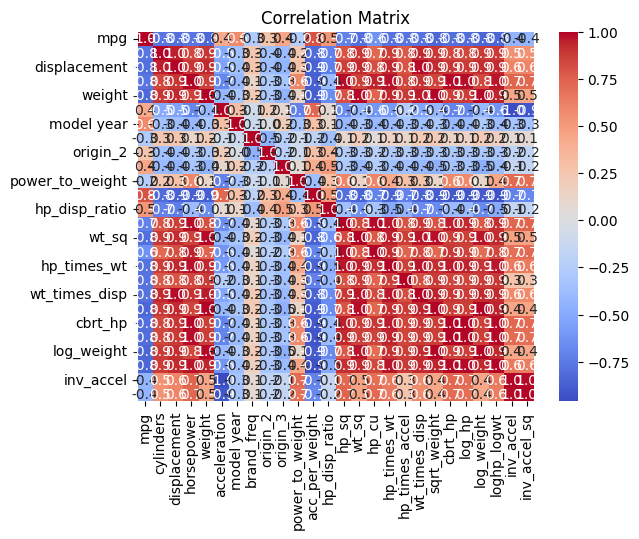

In [ ]:
# check corr and feature engineering

# feature engineering
df['power_to_weight'] = df['horsepower'] / df['weight']
df["acc_per_weight"]  = df["acceleration"] / df["weight"]
df['hp_disp_ratio'] = df['horsepower'] / df['displacement']
df['hp_sq'] = df['horsepower']**2
df['wt_sq'] = df['weight']**2
df['hp_cu'] = df['horsepower']**3  # use with caution (outliers)
df['hp_times_wt'] = df['horsepower'] * df['weight']
df['hp_times_accel'] = df['horsepower'] * df['acceleration']
df['wt_times_disp'] = df['weight'] * df['displacement']
df['sqrt_weight'] = np.sqrt(df['weight'])
df['cbrt_hp'] = np.cbrt(df['horsepower'])
df['log_hp'] = np.log1p(df['horsepower'])
df['log_weight'] = np.log1p(df['weight'])
df['loghp_logwt'] = df['log_hp'] * df['log_weight']

df['inv_accel'] = 1 / df['acceleration']
df['inv_accel_sq'] = 1 / (df['acceleration']**2)


# corr
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# TODO: Scale numerical features (optional but improves model stability).
# - Try StandardScaler or MinMaxScaler
# - Keep target variable (mpg) untouched

X = df.drop("mpg", axis=1)
y = df["mpg"]


mms = MinMaxScaler()
cols = X.columns
X = mms.fit_transform(X)
X = pd.DataFrame(X, columns=cols)
X = np.log1p(X)

## 🔹 Step 6: Train-Test Split

In [ ]:
# TODO: Split the dataset into train and test sets.
# - Use train_test_split (e.g., test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🔹 Step 7: Train Linear Regression Model

In [ ]:
# TODO: Train a Linear Regression model.
# - Import from sklearn.linear_model
# - Fit on training data
# - Predict on test data

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


## 🔹 Step 8: Model Evaluation

In [ ]:
# TODO: Evaluate the model using R² score.
# - Print R² on training and test sets
# - Interpret: does the model generalize well?

r2 = r2_score(y_test, y_pred)
r2


0.8958329551362634

## 🔹 Step 9: Save & Submit


- Save your completed Jupyter Notebook as .ipynb.

- Upload your notebook to Kaggle Notebooks:

  1. Go to your Kaggle profile → Code → New Notebook

  2. Upload your .ipynb file

  3. Make sure it runs end-to-end without error

  4. Share the link with your instructor